In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
data = pd.read_csv('../ai_medreview/data/data.csv')
data.head()

,time,rating,free_text,do_better,surgery,pcn,sentiment_free_text,sentiment_score_free_text,sentiment_do_better,sentiment_score_do_better,free_text_len,do_better_len,rating_score,feedback_labels,improvement_labels,submission_id,respondent-id
0,2023-07-13 15:28:00,Extremely likely,Very friendly caring staff treated me with res...,NaN,Earls-Court-Surgery,Brompton-Health-PCN,positive,0.892932,neutral,0.000000,13.0,3,5.0,Staff Empathy and Compassion,NaN,NaN,NaN
1,2023-07-13 15:29:00,Extremely likely,NaN,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.000000,neutral,0.000000,4.0,0,5.0,NaN,NaN,NaN,NaN
2,2023-07-13 15:29:00,Extremely likely,The doctor was very understanding and very kno...,NaN,Earls-Court-Surgery,Brompton-Health-PCN,positive,0.969176,neutral,0.000000,8.0,5,5.0,Patient Respect,NaN,NaN,NaN
3,2023-07-13 15:30:00,Extremely likely,NaN,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.000000,neutral,0.000000,5.0,5,5.0,NaN,NaN,NaN,NaN
4,2023-07-13 15:31:00,Extremely likely,I was spoken to politely on the phone and a te...,No I was happy with everything,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.756987,positive,0.837488,44.0,6,5.0,Follow-up and Continuity of Care,Patient Respect,NaN,NaN


In [95]:
data = data[(data['sentiment_free_text'] == 'negative')]

In [96]:
data["time"] = pd.to_datetime(data["time"])
# Setting the 'time' column as the index
data = data[['time', 'feedback_labels']].copy()
data.set_index("time", inplace=True)
data.index = data.index.to_period("M")

In [97]:
data

,feedback_labels
time,
2023-07,Environment and Ambiance
2023-08,Reception Staff Interaction
2023-08,Follow-up and Continuity of Care
2023-08,Appointment Availability
2023-08,Follow-up and Continuity of Care
...,...
2024-05,Waiting Time
2024-05,Appointment Availability
2024-05,Prescriptions and Medication Management


In [98]:
pd.set_option('display.max_columns', None)

In [99]:
monthly_feedback_counts = (
    data.groupby([data.index, "feedback_labels"])
    .size()
    .unstack(fill_value=0)
)

In [100]:
monthly_feedback_counts

feedback_labels,Accessibility and Convenience,Appointment Availability,Communication Effectiveness,Environment and Ambiance,Feedback and Complaints Handling,Follow-up and Continuity of Care,Mental Health Support,Patient Education and Information,Patient Respect,Prescriptions and Medication Management,Reception Staff Interaction,Staff Empathy and Compassion,Staff Professionalism,Surgery Website,Test Results,Treatment Quality,Vaccinations,Waiting Time
time,,,,,,,,,,,,,,,,,,
2023-07,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-08,0,1,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0
2023-09,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2023-10,0,1,0,0,0,0,0,0,0,1,3,0,1,0,0,0,0,0
2023-11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2023-12,1,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,1
2024-02,8,37,4,2,1,21,0,2,10,7,27,3,3,1,12,3,3,13
2024-03,3,33,2,1,0,13,1,0,5,1,14,0,2,1,6,4,3,18
2024-04,0,25,3,2,0,8,0,1,3,3,8,0,0,0,12,4,0,5


In [101]:
monthly_feedback_counts['TOTAL'] = monthly_feedback_counts.sum(axis=1)

In [102]:
monthly_feedback_counts

feedback_labels,Accessibility and Convenience,Appointment Availability,Communication Effectiveness,Environment and Ambiance,Feedback and Complaints Handling,Follow-up and Continuity of Care,Mental Health Support,Patient Education and Information,Patient Respect,Prescriptions and Medication Management,Reception Staff Interaction,Staff Empathy and Compassion,Staff Professionalism,Surgery Website,Test Results,Treatment Quality,Vaccinations,Waiting Time,TOTAL
time,,,,,,,,,,,,,,,,,,,
2023-07,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2023-08,0,1,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,4
2023-09,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,4
2023-10,0,1,0,0,0,0,0,0,0,1,3,0,1,0,0,0,0,0,6
2023-11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2023-12,1,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,1,9
2024-02,8,37,4,2,1,21,0,2,10,7,27,3,3,1,12,3,3,13,157
2024-03,3,33,2,1,0,13,1,0,5,1,14,0,2,1,6,4,3,18,107
2024-04,0,25,3,2,0,8,0,1,3,3,8,0,0,0,12,4,0,5,74


In [103]:
monthly_feedback_counts.to_csv('counts.csv', index=False)

In [104]:
monthly_feedback_counts.columns

Index(['Accessibility and Convenience', 'Appointment Availability',
       'Communication Effectiveness', 'Environment and Ambiance',
       'Feedback and Complaints Handling', 'Follow-up and Continuity of Care',
       'Mental Health Support', 'Patient Education and Information',
       'Patient Respect', 'Prescriptions and Medication Management',
       'Reception Staff Interaction', 'Staff Empathy and Compassion',
       'Staff Professionalism', 'Surgery Website', 'Test Results',
       'Treatment Quality', 'Vaccinations', 'Waiting Time', 'TOTAL'],
      dtype='object', name='feedback_labels')

In [105]:
normalized_df = monthly_feedback_counts.loc[:,'Accessibility and Convenience':'Waiting Time'].div(monthly_feedback_counts['TOTAL'], axis=0)

In [106]:
normalized_df

feedback_labels,Accessibility and Convenience,Appointment Availability,Communication Effectiveness,Environment and Ambiance,Feedback and Complaints Handling,Follow-up and Continuity of Care,Mental Health Support,Patient Education and Information,Patient Respect,Prescriptions and Medication Management,Reception Staff Interaction,Staff Empathy and Compassion,Staff Professionalism,Surgery Website,Test Results,Treatment Quality,Vaccinations,Waiting Time
time,,,,,,,,,,,,,,,,,,
2023-07,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-08,0.000000,0.250000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-09,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
2023-10,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.500000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
2023-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12,0.111111,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.111111
2024-02,0.050955,0.235669,0.025478,0.012739,0.006369,0.133758,0.000000,0.012739,0.063694,0.044586,0.171975,0.019108,0.019108,0.006369,0.076433,0.019108,0.019108,0.082803
2024-03,0.028037,0.308411,0.018692,0.009346,0.000000,0.121495,0.009346,0.000000,0.046729,0.009346,0.130841,0.000000,0.018692,0.009346,0.056075,0.037383,0.028037,0.168224
2024-04,0.000000,0.337838,0.040541,0.027027,0.000000,0.108108,0.000000,0.013514,0.040541,0.040541,0.108108,0.000000,0.000000,0.000000,0.162162,0.054054,0.000000,0.067568


In [111]:
normalized_df.T

time,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-02,2024-03,2024-04,2024-05
feedback_labels,,,,,,,,,,
Accessibility and Convenience,0.0,0.00,0.00,0.000000,0.0,0.111111,0.050955,0.028037,0.000000,0.000000
Appointment Availability,0.0,0.25,0.25,0.166667,0.0,0.333333,0.235669,0.308411,0.337838,0.222222
Communication Effectiveness,0.0,0.00,0.00,0.000000,0.0,0.000000,0.025478,0.018692,0.040541,0.000000
Environment and Ambiance,1.0,0.00,0.25,0.000000,0.0,0.000000,0.012739,0.009346,0.027027,0.000000
Feedback and Complaints Handling,0.0,0.00,0.00,0.000000,0.0,0.000000,0.006369,0.000000,0.000000,0.000000
Follow-up and Continuity of Care,0.0,0.50,0.00,0.000000,0.0,0.111111,0.133758,0.121495,0.108108,0.222222
Mental Health Support,0.0,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.009346,0.000000,0.000000
Patient Education and Information,0.0,0.00,0.00,0.000000,0.0,0.000000,0.012739,0.000000,0.013514,0.111111
Patient Respect,0.0,0.00,0.00,0.000000,0.0,0.111111,0.063694,0.046729,0.040541,0.000000


In [107]:
normalized_df.to_csv('normalized.csv', index=False)

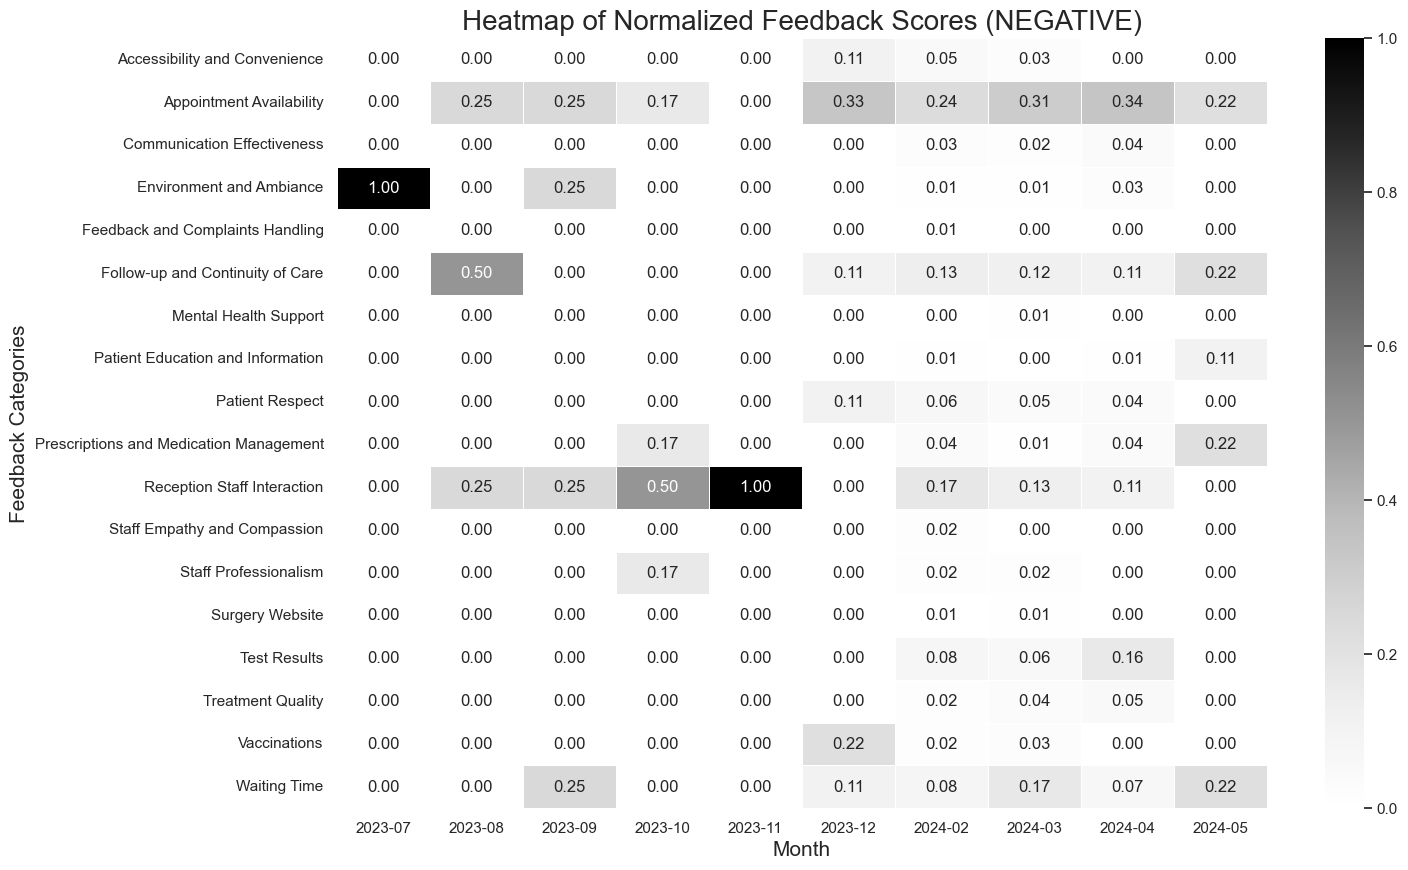

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the plot size
plt.figure(figsize=(15, 10))

# Creating a heatmap
sns.heatmap(normalized_df.T, annot=True, cmap="Grays", fmt=".2f", linewidths=.5)

# Adding titles and labels
plt.title('Heatmap of Normalized Feedback Scores (NEGATIVE)', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Feedback Categories', fontsize=15)

# Displaying the plot
plt.show()

In [109]:
long_df = normalized_df.melt(id_vars='Time', var_name='Feedback Category', value_name='Normalized Score')

KeyError: 'Time'